In [202]:
%matplotlib inline
import matplotlib.pyplot as pl
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
import seaborn as sns
import numpy as np

In [221]:
def plot_multiple_lightcurves(time, fluxes=(), labels=None,
                              offset_sigma=7., title='', markersize=2):
    """Returns a figure showing multiple lightcurves separated by an offset.
    
    Parameters
    ----------
    time : 1D array of size N.
        Times (i.e. x axis).
    
    fluxes: 1D array of size N, or sequence of 1D arrays of size N.
        Fluxes (i.e. y axis).
    
    labels : str, or sequence of str
        Labels corresponding to the fluxes.
    
    offset_sigma: float
        The lightcurves will be shown with an offset of 
        offset_sigma times the overall standard deviation.
    
    title : str
        Title to show at the top of the figure.
    """
    fig, ax = pl.subplots()
    # Input validation
    if not isinstance(fluxes, tuple):
        fluxes = [fluxes]
    if labels is None or len(labels) != len(fluxes):
        labels = [None] * len(fluxes)
    # Normalize the lightcurves
    normalized_fluxes = []
    for f in fluxes:
        normalized_fluxes.append(f / np.median(f))
    # How big should the spacing be between lightcurves?
    sampling_size = 20  # speedup
    std = np.std(np.array(normalized_fluxes)[::sampling_size].flatten())
    margin = offset_sigma * std
    # Plot all the lightcurves
    for idx in range(len(normalized_fluxes)):
        normalized = normalized_fluxes[idx] + idx*margin
        ax.plot(time, normalized,
                label=labels[idx],
                marker='o',
                markersize=markersize,
                linestyle='None')
    # Aesthetics
    ax.legend(bbox_to_anchor=(0., 1., 1., 0),
                       loc=3,
                       ncol=len(fluxes),
                       borderaxespad=0.,
                       handlelength=0.8,
                       frameon=True)
    ax.set_title(title)
    ax.set_xlim(np.min(time), np.max(time))
    ax.set_ylim([1 - margin, 1 + len(fluxes)*margin])
    return fig


def save_multiple_lightcurves_plot(output_fn='plot.png', **kwargs):
    plot_multiple_lightcurves(**kwargs).savefig(output_fn)

In [222]:
size = 3840
time = np.arange(0, size)
flux1 = np.ones(size) + np.random.normal(0, scale=0.1, size=size)
flux2 = np.ones(size) + np.random.normal(0, scale=0.1, size=size)
flux3 = np.ones(size) + np.random.normal(0, scale=0.1, size=size)

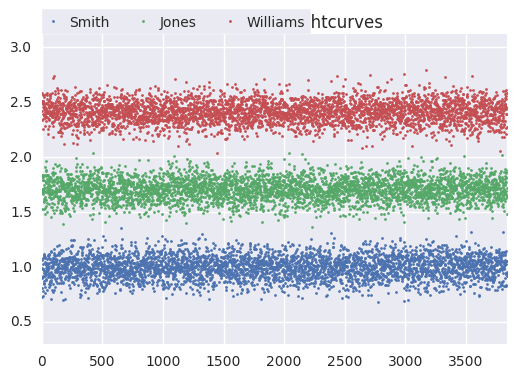

In [223]:
fig = plot_multiple_lightcurves(time=time,
                                fluxes=(flux1, flux2, flux3),
                                labels=('Smith', 'Jones', 'Williams'),
                                title='Comparison of lightcurves')